# Lab 1: Exploring Table Data
##### By. Liam Lowsley-Williams, Eli Laird, Fernando Vazquez

## 1. Business Understanding

The election season is around the corner and once again the democrats and republicans will go head to head for a spot in oval office. Having some insight on the election and its potential results is definitely a useful statistic to candidates as well as political parties. This is because it allows them to identify where candidates may need to increase their influence in order to swing the polls in their favor.

The 2012 and 2016 Presidential Election data has multiple csv files entailing different information about the elections however the csv we are interested in, the voting data, has 3,112 instances accross 80 features. The csv has catagorical and numerical features as well and we downloaded the dataset from kaggle.com.

Through visualization we hope to assist political parties in understanding the predicitve data mentioned above. This data can help guide candidates in election strategies moving forward with the 2020 presidential election.

========================================================================

Dataset: 
- 2012 and 2016 Presidential Elections
- https://www.kaggle.com/joelwilson/2012-2016-presidential-elections

Question Of Interest:
- Predicting the election result of a state given county voting data.

In [81]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [82]:
#read in data
county_facts = pd.read_csv("./2012-and-2016-presidential-elections/county_facts.csv")
county_facts_dict = pd.read_csv("./2012-and-2016-presidential-elections/county_facts_dictionary.csv")
results = pd.read_csv("./2012-and-2016-presidential-elections/US_County_Level_Presidential_Results_12-16.csv")
votes = pd.read_csv("./2012-and-2016-presidential-elections/votes.csv")


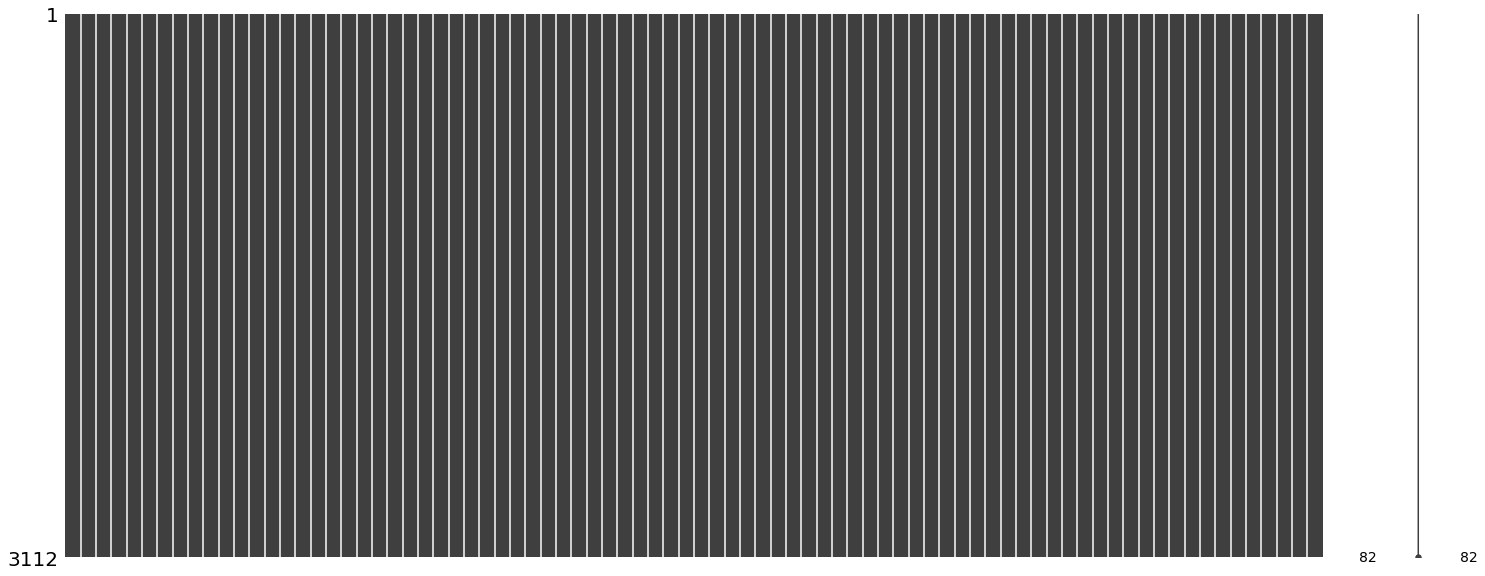

In [83]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(votes.sort_values(by=["state_abbr", "county_name"]))

In [89]:
concentration_votes_2016 = votes.groupby(by="state_abbr").sum()[["votes_dem_2016","votes_gop_2016","total_votes_2016","population2014","AGE295214"]]
concentration_votes_2016


,votes_dem_2016,votes_gop_2016,total_votes_2016,population2014,AGE295214
state_abbr,,,,,
AL,718084,1306925,2078165,4849377,1499.4
AR,378729,677904,1108615,2966369,1702.7
AZ,936250,1021154,2062810,6731484,357.7
CA,7230699,3841134,11733523,38802500,1306.0
CO,1212209,1137455,2564185,5355866,1335.8
CT,884432,668266,1623542,3596677,164.7
DC,260223,11553,280272,658893,17.5
DE,235581,185103,441535,935614,65.3
FL,4485745,4605515,9386750,19893297,1329.2


In [114]:
import plotly.graph_objects as go
import pandas as pd

percent_voted = (concentration_votes_2016['total_votes_2016']/ \
    (concentration_votes_2016['population2014']-concentration_votes_2016['AGE295214'])).round(3) * 100

text ='Democratic Votes: ' + concentration_votes_2016['votes_dem_2016'].astype(str) + '<br>' + \
    'Republican Votes: ' + concentration_votes_2016['votes_gop_2016'].astype(str) + '<br>' + \
    'Total Votes: ' + concentration_votes_2016['total_votes_2016'].astype(str) + '<br>' + \
    'Population 2014: ' + concentration_votes_2016['population2014'].astype(str) + '<br>' + \
    'Pecent Voted?: ' + (percent_voted).astype(str) + "%"

fig1 = go.Figure(
    data=go.Choropleth(
        locations=concentration_votes_2016.index, # Spatial coordinates
        z = concentration_votes_2016['total_votes_2016'].astype(int), # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'greys',
        colorbar_title = "# of voters (million)",
        text=text
    )
)

fig1.update_layout(
    title_text = 'Concentration of Total Votes By State',
    geo_scope='usa', # limite map scope to USA
)

fig1.show()

In [115]:
text =\
    'Republican Votes: ' + concentration_votes_2016['votes_gop_2016'].astype(str) + '<br>' + \
    'Total Votes: ' + concentration_votes_2016['total_votes_2016'].astype(str) + '<br>' + \
    'Population 2014: ' + concentration_votes_2016['population2014'].astype(str)

fig2 = go.Figure(
    data=go.Choropleth(
        locations=concentration_votes_2016.index, 
        z = concentration_votes_2016['votes_gop_2016'].astype(int), 
        locationmode = 'USA-states',
        colorscale = 'Reds',
        colorbar_title = "# of voters",
        text=text
    )
    
)

fig2.update_layout(
    title_text = '2016 Concentration of Republican Votes By State',
    geo_scope='usa',
)

fig2.show()

In [116]:
text =\
    'Democratic Votes: ' + concentration_votes_2016['votes_dem_2016'].astype(str) + '<br>' + \
    'Total Votes: ' + concentration_votes_2016['total_votes_2016'].astype(str) + '<br>' + \
    'Population 2014: ' + concentration_votes_2016['population2014'].astype(str)

fig3 = go.Figure(
    data=go.Choropleth(
        locations=concentration_votes_2016.index,
        z = concentration_votes_2016['votes_dem_2016'].astype(int),
        locationmode = 'USA-states',
        colorscale = 'Blues',
        colorbar_title = "# of voters",
        text=text
    )
)

fig3.update_layout(
    title_text = '2016 Concentration of Democratic Votes By State',
    geo_scope='usa',
)

fig3.show()